# Image encoding using quantum circuits

## Quantum Image Encoding using Convolution

In [3]:
!pip install pennylane
!pip install pennylane-qiskit
!pip install qiskit
!pip install qml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 38.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.9/249.9 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.7/323.7 kB 30.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 7.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 15.1 MB/s eta 0:00:00
 

# Bring in Pennylane quantum for qiskit

In [14]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.templates import RandomLayers

Initialize number of wires (aka qubits) and the number of layers for circuit

In [15]:
n_w = 4
n_layers = 1

Select a Qiskit AER quantum simulator

In [16]:
dev = qml.device('qiskit.aer', wires= n_w)

Generate a random circuit used for image encoding

In [19]:
rand_params = np.random.uniform(high= 2 * np.pi, size=(n_layers, n_w))

Build the quantum circuit for image encoding

In [20]:
@qml.qnode(dev)
def circuit(phi=None):
    # Encoding of 4 classical input values
    for j in range(n_w):
        qml.RY(np.pi * phi[j], wires=j)

    # Random quantum circuit
    RandomLayers(rand_params, wires=list(range(n_w)))

    # Measurement producing 4 classical output values
    return [qml.expval(qml.PauliZ(j)) for j in range(n_w)]


    return measured_str

Quantum Convolution algorithm for image encoding

In [21]:
def quanv(image, kr=2):
    h_feat, w_feat = image.shape
    """Convolves the input speech with many applications of the same quantum circuit."""
    out = np.zeros((h_feat//kr, w_feat//kr, n_w))

    # Loop over the coordinates of the top-left pixel of 2X2 squares
    for j in range(0, h_feat, kr):
        for k in range(0, w_feat, kr):
            # Process a squared 2x2 region of the image with a quantum circuit
            q_results = circuit(
                # kernal 3 ## phi=[image[j, k, 0], image[j, k + 1, 0], image[j, k + 2, 0], image[j + 1, k, 0],
                # image[j + 1, k + 1, 0], image[j + 1, k +2 , 0],image[j+2, k, 0], image[j+2, k+1, 0], image[j+2, k+2, 0]]
                phi=[image[j, k], image[j, k + 1], image[j + 1, k], image[j + 1, k + 1]]
            )
            # Assign expectation values to different channels of the output pixel (j/2, k/2)
            for c in range(n_w):
                out[j // kr, k // kr, c] = q_results[c]
    return out

# Testing quantum image processing using quantum convolution techniques

## Background

Convolutional neural network (CNN) is a special type of a neural network, designed to process data in chunks using convolutional filters. For instance, speech signal is a one-dimensional time-series which the network observes one "chunk" at a time; but the data could also be two-dimensional, such as an image. If we process this as an image, the network processes through a small two-dimensional window. The structure of the convolutional
neural network is similar to the regular neural network. For example, by substituting one of the regular layers in a neural network (below) with a convolutional layer, we have just turned it to a simple example of CNN.

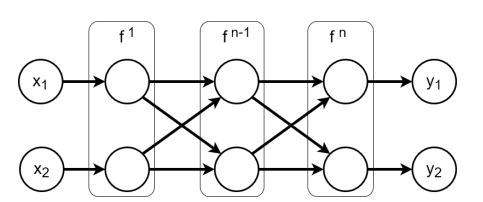

The key ingredient of a CNN, Convolution, is mathematical operation of two functions over some number. Suppose we have a ship and observe its location *x(t)* using a synthetic apatature radar (SAR). At each time step *t* we get different value for the location. SAR is noisy and to counter that we will use weight function *w(a)* that takes weighted average of locations over time. Parameter *a* is the age of observation. Now if we put both of these functions together we obtain function *s(t)*, which is smoothed estimate of the location over time.

Formally, convolution of signal *x(a)* with weight function *w* takes the form:

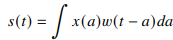


While the above equation assumes continuous signal, in machine learning applications both the input and the kernel (convolutional filter) are usually multidimensional arrays. That means, they are discrete and consequently the above integral gets replaced by summation operations

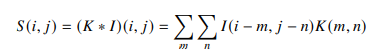

We can take this idea and operate this on a two-dimensional case

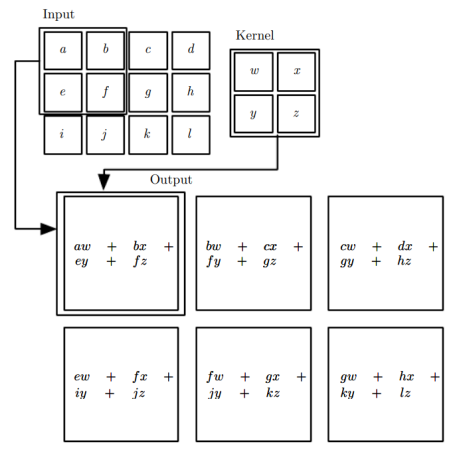

We can see that an input image 3x4, kernel of 2x2 convolution mask will produce an output image of 2x3

## Quantum convolution

Let's look at how we look at this from a quantum system. As we learned, we take classical information and put them into the quantum state. We can use similar convolution algorithm, but apply them using quantum circuits. Let's take a look

Let's first take a binary image

In [29]:
import matplotlib.pyplot as plt

# Function for plotting the image using matplotlib
def plot_image(img, title: str):
    plt.title(title)
    plt.xticks(range(img.shape[0]))
    plt.yticks(range(img.shape[1]))
    plt.imshow(img, extent=[0, img.shape[0], img.shape[1], 0], cmap='viridis')
    plt.show()

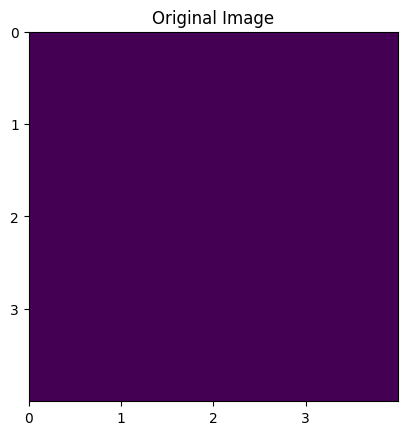

In [54]:
image = np.array([[0, 0, 0, 0],
                  [0, 0, 0, 0],
                  [0, 0, 0, 0],
                  [0, 0, 0, 0]])

plot_image(image, 'Original Image')

In [55]:
out = quanv(image, 2)

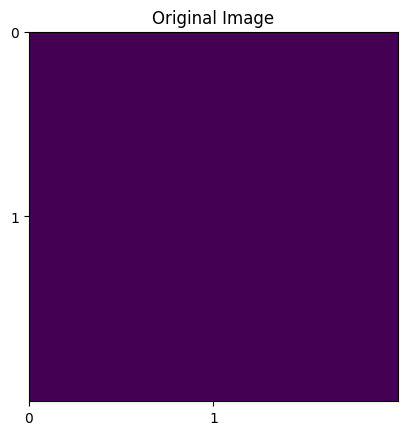

In [56]:
plot_image(out[:,:,0], 'Original Image')

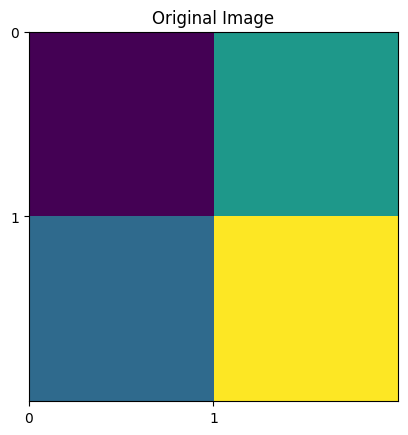

In [57]:
plot_image(out[:,:,1], 'Original Image')

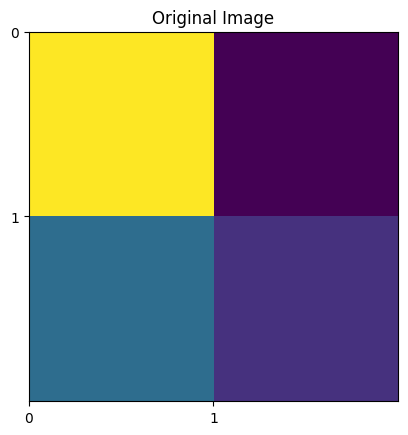

In [58]:
plot_image(out[:,:,2], 'Original Image')

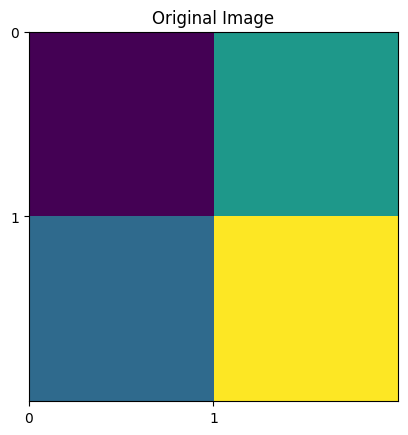

In [59]:
plot_image(out[:,:,3], 'Original Image')

What do you see here? We have a kernel size of 2x2 and an image size of 4x4. Our output is an image size of 2x2. We also see that each of the 4 wires (qubit output) shows different images. This is due to our encoding method for the images.
We started with a random layer and encoded the circuit. What does our quantum circuit look like?

In [66]:
drawer = qml.draw(circuit)
print(drawer(image))
dev._circuit.draw()

0: ──RY(M0)─╭RandomLayers(M1)─┤  <Z>
1: ──RY(M0)─├RandomLayers(M1)─┤  <Z>
2: ──RY(M0)─├RandomLayers(M1)─┤  <Z>
3: ──RY(M0)─╰RandomLayers(M1)─┤  <Z>

M0 = 
[0. 0. 0. 0.]
M1 = 
[[4.43869519 3.05435108 2.26027827 5.53733412]]


┌───────┐              ┌─┐                                       
q_0: ┤ Ry(0) ├──────────────┤M├───────────────────────────────────────
     ├───────┤┌────────────┐└╥┘                                 ┌─┐   
q_1: ┤ Ry(0) ├┤ Ry(4.4387) ├─╫───■──────────────────────────────┤M├───
     ├───────┤├────────────┤ ║   │  ┌────────────┐┌────────────┐└╥┘┌─┐
q_2: ┤ Ry(0) ├┤ Rx(3.0544) ├─╫───┼──┤ Rz(2.2603) ├┤ Rx(5.5373) ├─╫─┤M├
     ├───────┤└────────────┘ ║ ┌─┴─┐└────┬─┬─────┘└────────────┘ ║ └╥┘
q_3: ┤ Ry(0) ├───────────────╫─┤ X ├─────┤M├─────────────────────╫──╫─
     └───────┘               ║ └───┘     └╥┘                     ║  ║ 
c: 4/════════════════════════╩════════════╩══════════════════════╩══╩═
                             0            3                      1  2

We can see that each of the wire (qubit) performs different gates, this is why we see different images.

Let's look at another way of encoding an image

# QFT image encoding

Let's look at encoding a binary image using quantum fourier transform

In [67]:
!pip install qiskit_aer

Bring in some images

In [83]:
from qiskit.visualization import plot_bloch_multivector
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi
import cv2
from qiskit import QuantumCircuit

In [68]:
def rotations(quantum_circuit, n): # Installs necessary rotation gates onto an empty circuit
    if n == 0: # Returns finalised generated circuit upon meeting the last qubit
        return quantum_circuit
    n -= 1 # Decrements current qubit to continue generating circuit
    """Generates gates for QFT"""
    quantum_circuit.h(n) # Hadamard gate application
    for qubit in range(n):
        quantum_circuit.cp(pi/2**(n-qubit), qubit, n) # Controlled-phase gate application
    rotations(quantum_circuit, n) # Utilises recursion to rotate the rest of the n-1 qubits

In [69]:
def swap(quantum_circuit, n): # Swaps qubits in order to match QFT definition
    for qubit in range(n//2):
        quantum_circuit.swap(qubit, n-qubit-1)
    return quantum_circuit

In [70]:
def qft(quantum_circuit, n): # Generalised QFT-circuit generator based on mathematical derivation
    """Generation is split into two functions"""
    rotations(quantum_circuit, n)
    swap(quantum_circuit, n)
    return quantum_circuit # Returns finalised circuit

In [71]:
def image_to_binary(path): # Converts image to binary and presents data in a flattened NumPy array
    image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    image_array = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)[1]
    return image_array.flatten(order='C') # Returns flattened image pixel values in a row-wise mannerdef image_to_binary(path): # Converts image to binary and presents data in a flattened NumPy array
    image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    image_array = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)[1]
    return image_array.flatten(order='C') # Returns flattened image pixel values in a row-wise manner

In [79]:
def basis_encode(array): # Encodes array into a quantum circuit via computational basis states
    quantum_circuit = QuantumCircuit(array.size) # Creates a new circuit with enough qubits to hold the image
    n = 0 # Begins encoding from 0th qubit
    for bit in array:
        print(bit)
        if bit > 0: # Applies Pauli-X gate to qubit to represent coloured value
            quantum_circuit.x(n)
        elif bit == 0:
            pass
        n += 1 # Continues to encode the next qubit
    return quantum_circuit # Returns the finalised quantum circuit

We begin by doing a basic encoding of a binary image

In [81]:
from google.colab import drive

drive.mount('/content/drive/', force_remount=True)
%cd '/content/drive/My Drive/Colab Notebooks/'

Mounted at /content/drive/
/content/drive/My Drive/Colab Notebooks


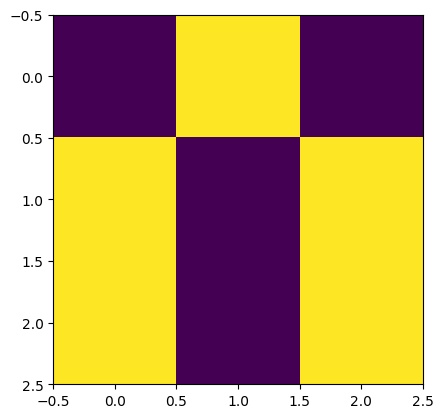

In [84]:
image = cv2.imread("test.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(image)
plt.show()

Encodes an image onto a quantum circuit

In [85]:
circuit = basis_encode(image_to_binary("test.png"))

0
255
0
255
0
255
255
0
255


In [86]:
from qiskit_aer import Aer

simulator = Aer.get_backend("aer_simulator") # Qiskit Aer simulator instantiation

We can encode the binary values into qubits using the computational basis (along the Z axis)

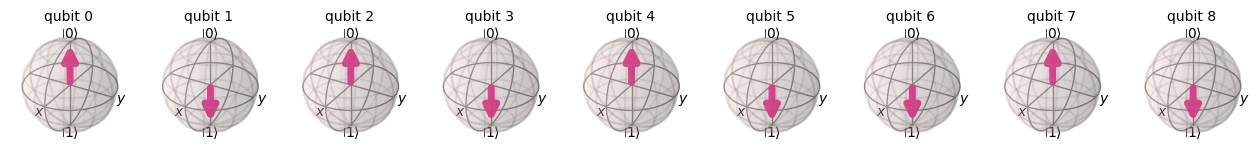

In [87]:
qc_init = circuit.copy()
qc_init.save_statevector()
statevector = simulator.run(qc_init).result().get_statevector()
plot_bloch_multivector(statevector)

Does the binary (classical) match the qubits? Let's look at the circuit.



In [89]:
qc_init.draw()

statevector 
q_0: ───────────░──────
     ┌───┐      ░      
q_1: ┤ X ├──────░──────
     └───┘      ░      
q_2: ───────────░──────
     ┌───┐      ░      
q_3: ┤ X ├──────░──────
     └───┘      ░      
q_4: ───────────░──────
     ┌───┐      ░      
q_5: ┤ X ├──────░──────
     ├───┤      ░      
q_6: ┤ X ├──────░──────
     └───┘      ░      
q_7: ───────────░──────
     ┌───┐      ░      
q_8: ┤ X ├──────░──────
     └───┘      ░

You can see this is a one to one mapping. But can we do more? What happens if we apply QFT circuit after the basis encoding?

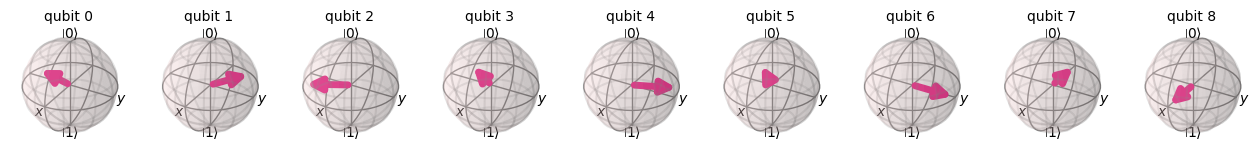

In [90]:
qft(circuit, image_to_binary("test.png").size) # Applies QFT to encoded image
circuit.save_statevector()
statevector = simulator.run(circuit).result().get_statevector()
plot_bloch_multivector(statevector)

You can see the circuit adding QFT after the basis encoding

In [91]:
circuit.draw()

»
q_0: ───────────■───────────────────────────────────────────────────────────»
     ┌───┐      │                                                           »
q_1: ┤ X ├──────┼──────────■────────────────────────────────────────────────»
     └───┘      │          │                                                »
q_2: ───────────┼──────────┼──────────■─────────────────────────────────────»
     ┌───┐      │          │          │                                     »
q_3: ┤ X ├──────┼──────────┼──────────┼─────────■───────────────────────────»
     └───┘      │          │          │         │                           »
q_4: ───────────┼──────────┼──────────┼─────────┼─────────■─────────────────»
     ┌───┐      │          │          │         │         │                 »
q_5: ┤ X ├──────┼──────────┼──────────┼─────────┼─────────┼─────────■───────»
     ├───┤      │          │          │         │         │         │       »
q_6: ┤ X ├──────┼──────────┼──────────┼─────────┼─────────┼─────────┼───────»
     └───┘      │          │          │         │         │         │       »
q_7: ───────────┼──────────┼──────────┼─────────┼─────────┼─────────┼───────»
     ┌───┐┌───┐ │P(π/256)  │P(π/128)  │P(π/64)  │P(π/32)  │P(π/16)  │P(π/8) »
q_8: ┤ X ├┤ H ├─■──────────■──────────■─────────■─────────■─────────■───────»
     └───┘└───┘                                                             »
«                                                                              »
«q_0: ────────────────────────■────────────────────────────────────────────────»
«                             │                                                »
«q_1: ────────────────────────┼──────────■─────────────────────────────────────»
«                             │          │                                     »
«q_2: ────────────────────────┼──────────┼─────────■───────────────────────────»
«                             │          │         │                           »
«q_3: ────────────────────────┼──────────┼─────────┼─────────■─────────────────»
«                             │          │         │         │                 »
«q_4: ────────────────────────┼──────────┼─────────┼─────────┼─────────■───────»
«                             │          │         │         │         │       »
«q_5: ────────────────────────┼──────────┼─────────┼─────────┼─────────┼───────»
«                             │          │         │         │         │       »
«q_6: ─■──────────────────────┼──────────┼─────────┼─────────┼─────────┼───────»
«      │                ┌───┐ │P(π/128)  │P(π/64)  │P(π/32)  │P(π/16)  │P(π/8) »
«q_7: ─┼────────■───────┤ H ├─■──────────■─────────■─────────■─────────■───────»
«      │P(π/4)  │P(π/2) └───┘                                                  »
«q_8: ─■────────■──────────────────────────────────────────────────────────────»
«                                                                              »
«                                                                            »
«q_0: ────────────────────────■──────────────────────────────────────────────»
«                             │                                              »
«q_1: ────────────────────────┼─────────■────────────────────────────────────»
«                             │         │                                    »
«q_2: ────────────────────────┼─────────┼─────────■──────────────────────────»
«                             │         │         │                          »
«q_3: ────────────────────────┼─────────┼─────────┼─────────■────────────────»
«                             │         │         │         │                »
«q_4: ────────────────────────┼─────────┼─────────┼─────────┼────────■───────»
«                             │         │         │         │        │       »
«q_5: ─■──────────────────────┼─────────┼─────────┼─────────┼────────┼───────»
«      │                ┌───┐ │P(π/64)  │P(π/32)  │P(π/16)  │P(π/8)  │P(π/4) »
«q_6: ─┼────────■───────┤ H 